# HPC Linear Regression - Complete Experimental Data Analysis

**Experiment Configuration:**
- Problem size: n=100,000 samples, d=100 features
- Algorithms: OLS (direct solve) and GD (gradient descent, 1000 iterations)
- Number of processes: p = 1, 2, 4, 8
- Each configuration repeated: 5 times
- Cluster: HPC3 @ UniTN

**This notebook will generate:**
- 7 plots (OLS: 3 individual + GD: 1 + Comparison: 3)
- Statistical tables (CSV + Markdown)
- Detailed performance analysis report

---
## Part 1: OLS (Ordinary Least Squares) Performance Analysis

### Step 1: Import Libraries and Configure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

print("Libraries imported successfully")
print(f"Working directory: {os.getcwd()}")

Libraries imported successfully
Working directory: /home/da.li/HPC-Linear-Regression


### Step 2: Load OLS Experimental Data

In [2]:
# Load OLS data
df_ols = pd.read_csv('results/ols_strong_scaling.csv')
# df_ols['processes'] = df_ols['processes'].astype(int)

print(f"OLS data loaded: {len(df_ols)} records")
print(f"\nData preview:")
print(df_ols.head(10))
print(f"\nProcess configurations: {sorted(df_ols['processes'].unique())}")
print(f"Runs per configuration: {df_ols.groupby('processes').size().tolist()}")

OLS data loaded: 20 records

Data preview:
   run  processes  time_seconds
0    1          1      0.365962
1    2          1      0.366080
2    3          1      0.366517
3    4          1      0.373019
4    5          1      0.367168
5    1          2      0.205276
6    2          2      0.204744
7    3          2      0.210006
8    4          2      0.205525
9    5          2      0.206139

Process configurations: [np.int64(1), np.int64(2), np.int64(4), np.int64(8)]
Runs per configuration: [5, 5, 5, 5]


In [3]:
print(df_ols['processes'].unique())
print(df_ols.head())

[1 2 4 8]
   run  processes  time_seconds
0    1          1      0.365962
1    2          1      0.366080
2    3          1      0.366517
3    4          1      0.373019
4    5          1      0.367168


### Step 3: Compute OLS Statistics

In [4]:
# Compute statistics
stats_ols = df_ols.groupby('processes')['time_seconds'].agg(['mean', 'std', 'min', 'max'])
stats_ols['cv_percent'] = (stats_ols['std'] / stats_ols['mean']) * 100

# Compute speedup and efficiency
baseline_ols = stats_ols.loc[1, 'mean']
stats_ols['speedup'] = baseline_ols / stats_ols['mean']
stats_ols['efficiency'] = (stats_ols['speedup'] / stats_ols.index) * 100

print("OLS performance metrics:")
print("="*70)
print(f"{'Processes':<8} {'Mean Time(s)':<12} {'Speedup':<10} {'Efficiency(%)':<10}")
print("="*70)
for p in stats_ols.index:
    print(f"{p:<8} {stats_ols.loc[p, 'mean']:<12.4f} {stats_ols.loc[p, 'speedup']:<10.2f} {stats_ols.loc[p, 'efficiency']:<10.1f}")
print("="*70)

OLS performance metrics:
Processes Mean Time(s) Speedup    Efficiency(%)
1        0.3677       1.00       100.0     
2        0.2063       1.78       89.1      
4        0.1209       3.04       76.1      
8        0.0767       4.79       59.9      


### Step 4: Save OLS Statistics Table

In [5]:
# Save statistics table
report_ols = stats_ols[['mean', 'std', 'speedup', 'efficiency']].copy()
report_ols.columns = ['Mean_Time(s)', 'Std_Dev(s)', 'Speedup', 'Efficiency(%)']
report_ols.to_csv('results/summary_statistics.csv')

# Save as Markdown
with open('results/summary_statistics.md', 'w') as f:
    f.write("# OLS Strong Scaling Results\n\n")
    f.write(report_ols.to_markdown())

print("Statistics tables saved")
print("   - results/summary_statistics.csv")
print("   - results/summary_statistics.md")

Statistics tables saved
   - results/summary_statistics.csv
   - results/summary_statistics.md


### Step 5: OLS Speedup Plot

Saved: results/speedup_plot.png


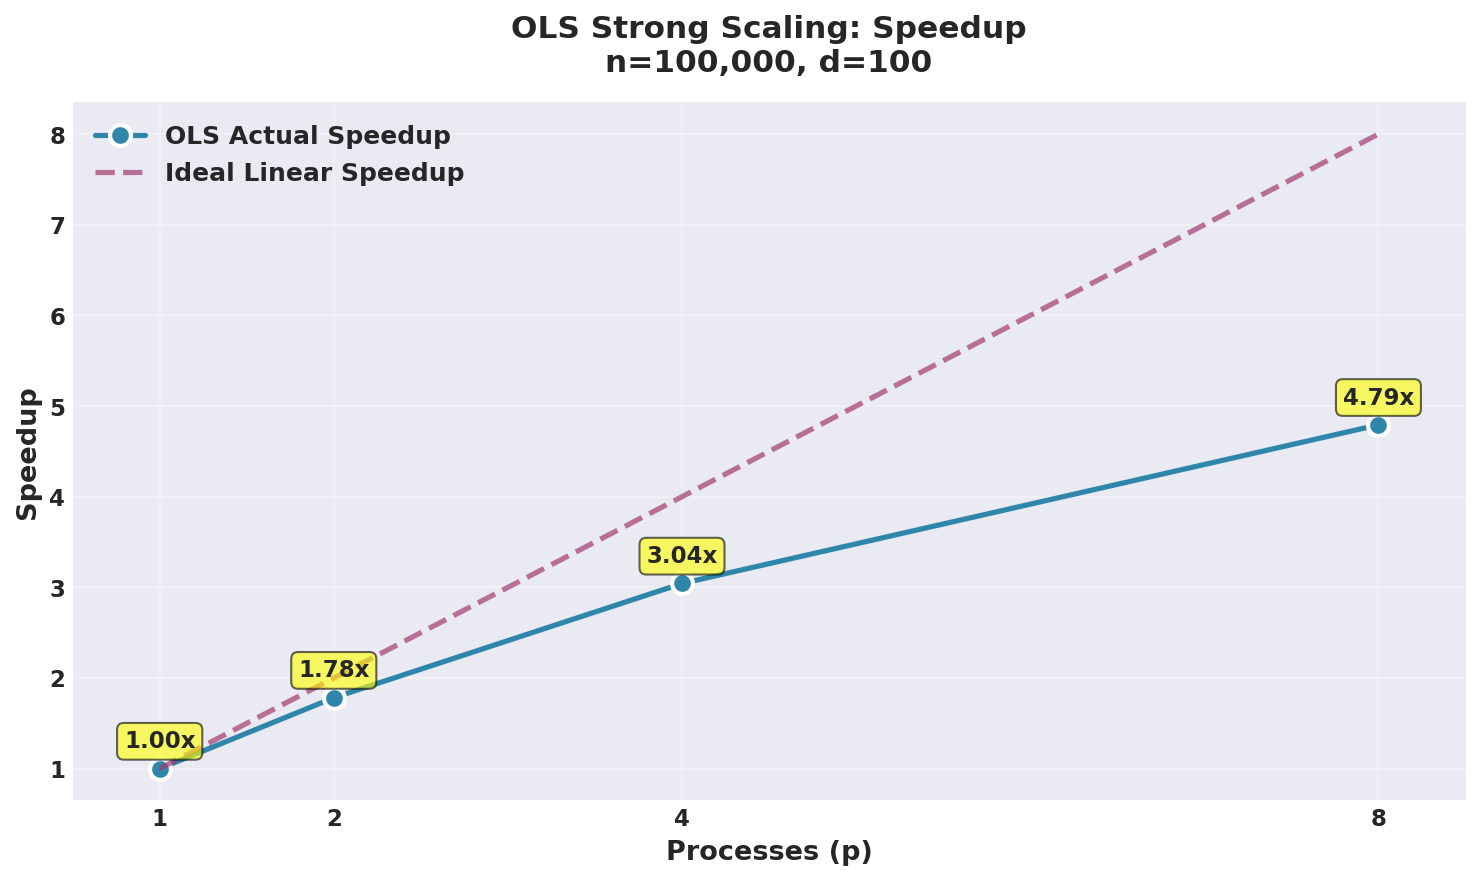

In [ ]:
processes = np.array(sorted(stats_ols.index))
speedups_ols = stats_ols['speedup'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(processes, speedups_ols, 'o-', linewidth=2.5, markersize=10, 
        label='OLS Actual Speedup', color='#2E86AB', markeredgewidth=2, markeredgecolor='white')
ax.plot(processes, processes, '--', linewidth=2.5, label='Ideal Linear Speedup', color='#A23B72', alpha=0.7)

ax.set_xlabel('Processes (p)', fontsize=13, fontweight='bold')
ax.set_ylabel('Speedup', fontsize=13, fontweight='bold')
# ax.set_title('OLS Strong Scaling: Speedup\nn=100,000, d=100', fontsize=15, fontweight='bold', pad=15)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xticks(processes)
ax.set_xlim(0.5, 8.5)

for p, s in zip(processes, speedups_ols):
    ax.annotate(f'{s:.2f}x', (p, s), textcoords="offset points", xytext=(0, 10), 
                ha='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.6))

plt.tight_layout()
plt.savefig('results/speedup_plot.png', dpi=300, bbox_inches='tight')
print("Saved: results/speedup_plot.png")
plt.show()

### Step 6: OLS Efficiency Plot

In [10]:
stats_ols.head()

,mean,std,min,max,cv_percent,speedup,efficiency
processes,,,,,,,
1,0.367749,0.002984,0.365962,0.373019,0.811311,1.000000,100.000000
2,0.206338,0.002111,0.204744,0.210006,1.023027,1.782266,89.113300
4,0.120872,0.000726,0.119991,0.122014,0.600248,3.042473,76.061827
8,0.076736,0.000546,0.076110,0.077586,0.711719,4.792407,59.905090


Saved: results/efficiency_plot.png


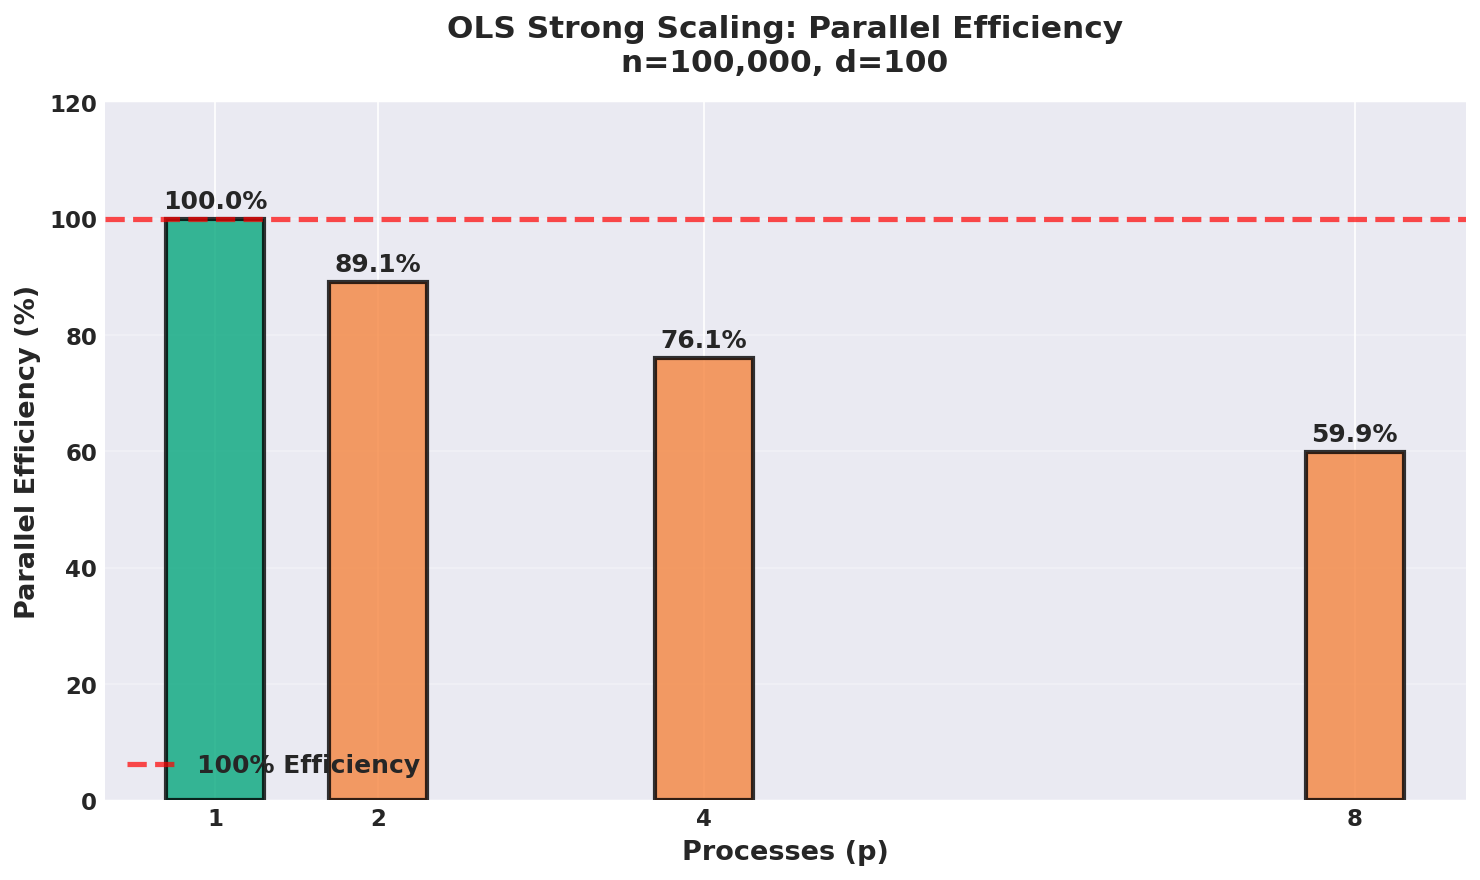

In [ ]:
efficiencies_ols = stats_ols['efficiency'].values

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#06A77D' if e >= 100 else '#F5853F' for e in efficiencies_ols]
bars = ax.bar(processes, efficiencies_ols, color=colors, alpha=0.8, 
              edgecolor='black', linewidth=2, width=0.6)
ax.axhline(y=100, color='red', linestyle='--', linewidth=2.5, label='100% Efficiency', alpha=0.7)

ax.set_xlabel('Processes (p)', fontsize=13, fontweight='bold')
ax.set_ylabel('Parallel Efficiency (%)', fontsize=13, fontweight='bold')
# ax.set_title('OLS Strong Scaling: Parallel Efficiency\nn=100,000, d=100', fontsize=15, fontweight='bold', pad=15)
# ax.set_ylim(95, 105)
ax.set_ylim(0, 120)
ax.legend(fontsize=12, loc='lower left')
ax.grid(True, alpha=0.3, axis='y')
ax.set_xticks(processes)

for bar, eff in zip(bars, efficiencies_ols):
    height = bar.get_height()
    ax.annotate(f'{eff:.1f}%', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 5), textcoords="offset points", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('results/efficiency_plot.png', dpi=300, bbox_inches='tight')
print("Saved: results/efficiency_plot.png")
plt.show()

### Step 7: OLS Combined Plot

Saved: results/combined_plot.png


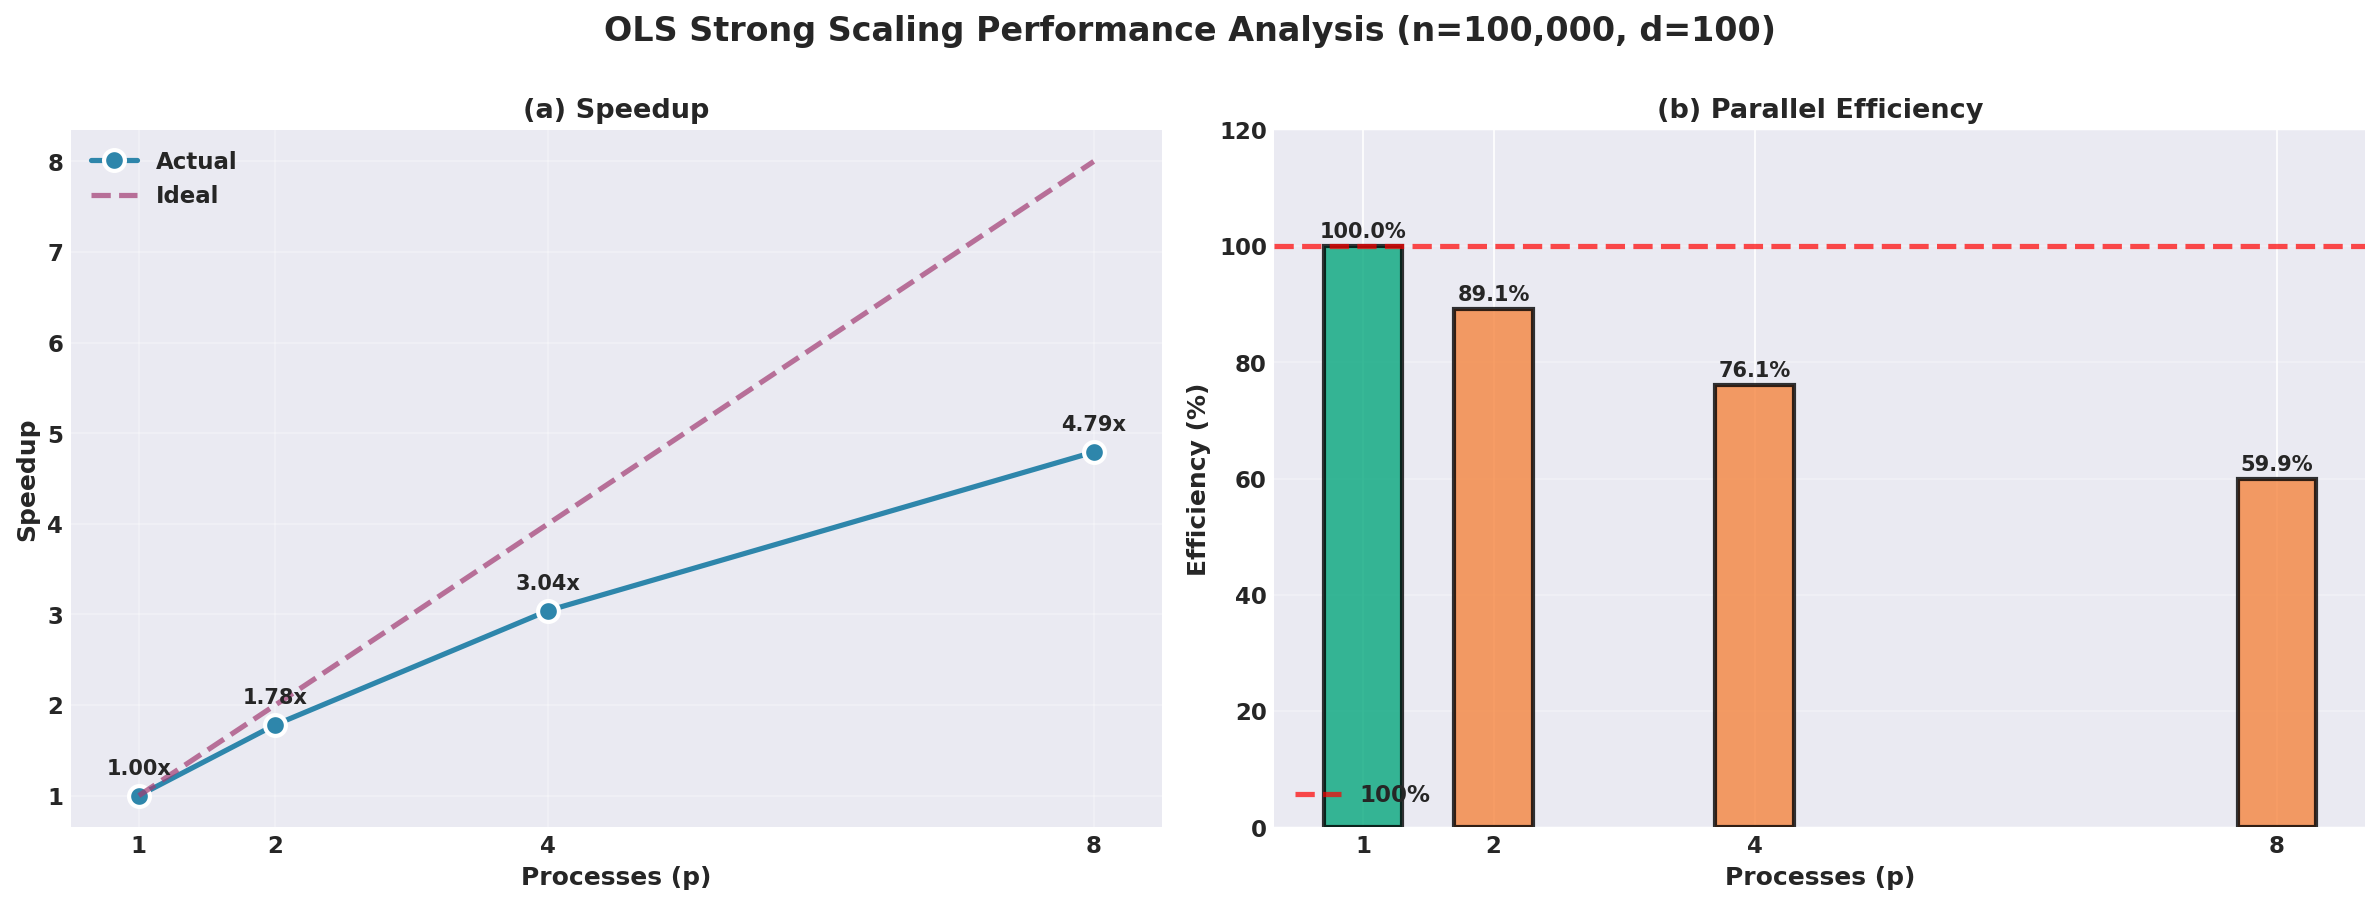

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left: Speedup
ax1.plot(processes, speedups_ols, 'o-', linewidth=2.5, markersize=10, 
         label='Actual', color='#2E86AB', markeredgewidth=2, markeredgecolor='white')
ax1.plot(processes, processes, '--', linewidth=2.5, label='Ideal', color='#A23B72', alpha=0.7)
ax1.set_xlabel('Processes (p)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Speedup', fontsize=12, fontweight='bold')
ax1.set_title('(a) Speedup', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11, loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(processes)
ax1.set_xlim(0.5, 8.5)

# Right: Efficiency
colors = ['#06A77D' if e >= 100 else '#F5853F' for e in efficiencies_ols]
bars = ax2.bar(processes, efficiencies_ols, color=colors, alpha=0.8, edgecolor='black', linewidth=2, width=0.6)
ax2.axhline(y=100, color='red', linestyle='--', linewidth=2.5, label='100%', alpha=0.7)
ax2.set_xlabel('Processes (p)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Efficiency (%)', fontsize=12, fontweight='bold')
ax2.set_title('(b) Parallel Efficiency', fontsize=13, fontweight='bold')
ax2.set_ylim(0, 120)
ax2.legend(fontsize=11, loc='lower left')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xticks(processes)

for p, s in zip(processes, speedups_ols):
    ax1.annotate(f'{s:.2f}x', (p, s), textcoords="offset points", xytext=(0, 10), 
                 ha='center', fontsize=10, fontweight='bold')
for bar, eff in zip(bars, efficiencies_ols):
    ax2.annotate(f'{eff:.1f}%', xy=(bar.get_x()+bar.get_width()/2, bar.get_height()),
                 xytext=(0, 4), textcoords="offset points", ha='center', fontsize=10, fontweight='bold')

# plt.suptitle('OLS Strong Scaling Performance Analysis (n=100,000, d=100)', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('results/combined_plot.png', dpi=300, bbox_inches='tight')
print("Saved: results/combined_plot.png")
plt.show()

---
## Part 2: GD (Gradient Descent) Performance Analysis

### Step 8: Load GD Experimental Data

In [16]:
# Load GD data
df_gd = pd.read_csv('results/gd_strong_scaling.csv')

print(f"GD data loaded: {len(df_gd)} records")
print(f"\nData preview:")
print(df_gd.head())
print(f"\nProcess configurations: {sorted(df_gd['processes'].unique())}")

GD data loaded: 20 records

Data preview:
   run  processes  time_seconds
0    1          1     15.827100
1    2          1     16.387695
2    3          1     16.441699
3    4          1     16.380136
4    5          1     16.431081

Process configurations: [np.int64(1), np.int64(2), np.int64(4), np.int64(8)]


### Step 9: Compute GD Statistics

In [17]:
# Compute statistics
stats_gd = df_gd.groupby('processes')['time_seconds'].agg(['mean', 'std', 'min', 'max'])
stats_gd['cv_percent'] = (stats_gd['std'] / stats_gd['mean']) * 100

# Compute speedup and efficiency
baseline_gd = stats_gd.loc[1, 'mean']
stats_gd['speedup'] = baseline_gd / stats_gd['mean']
stats_gd['efficiency'] = (stats_gd['speedup'] / stats_gd.index) * 100

print("GD performance metrics (1000 iterations):")
print("="*70)
print(f"{'Processes':<8} {'Mean Time(s)':<12} {'Speedup':<10} {'Efficiency(%)':<10}")
print("="*70)
for p in stats_gd.index:
    print(f"{p:<8} {stats_gd.loc[p, 'mean']:<12.4f} {stats_gd.loc[p, 'speedup']:<10.2f} {stats_gd.loc[p, 'efficiency']:<10.1f}")
print("="*70)

GD performance metrics (1000 iterations):
Processes Mean Time(s) Speedup    Efficiency(%)
1        16.2935      1.00       100.0     
2        8.4217       1.93       96.7      
4        4.4811       3.64       90.9      
8        2.4554       6.64       82.9      


### Step 10: GD Speedup Plot

Saved: results/gd_speedup_plot.png


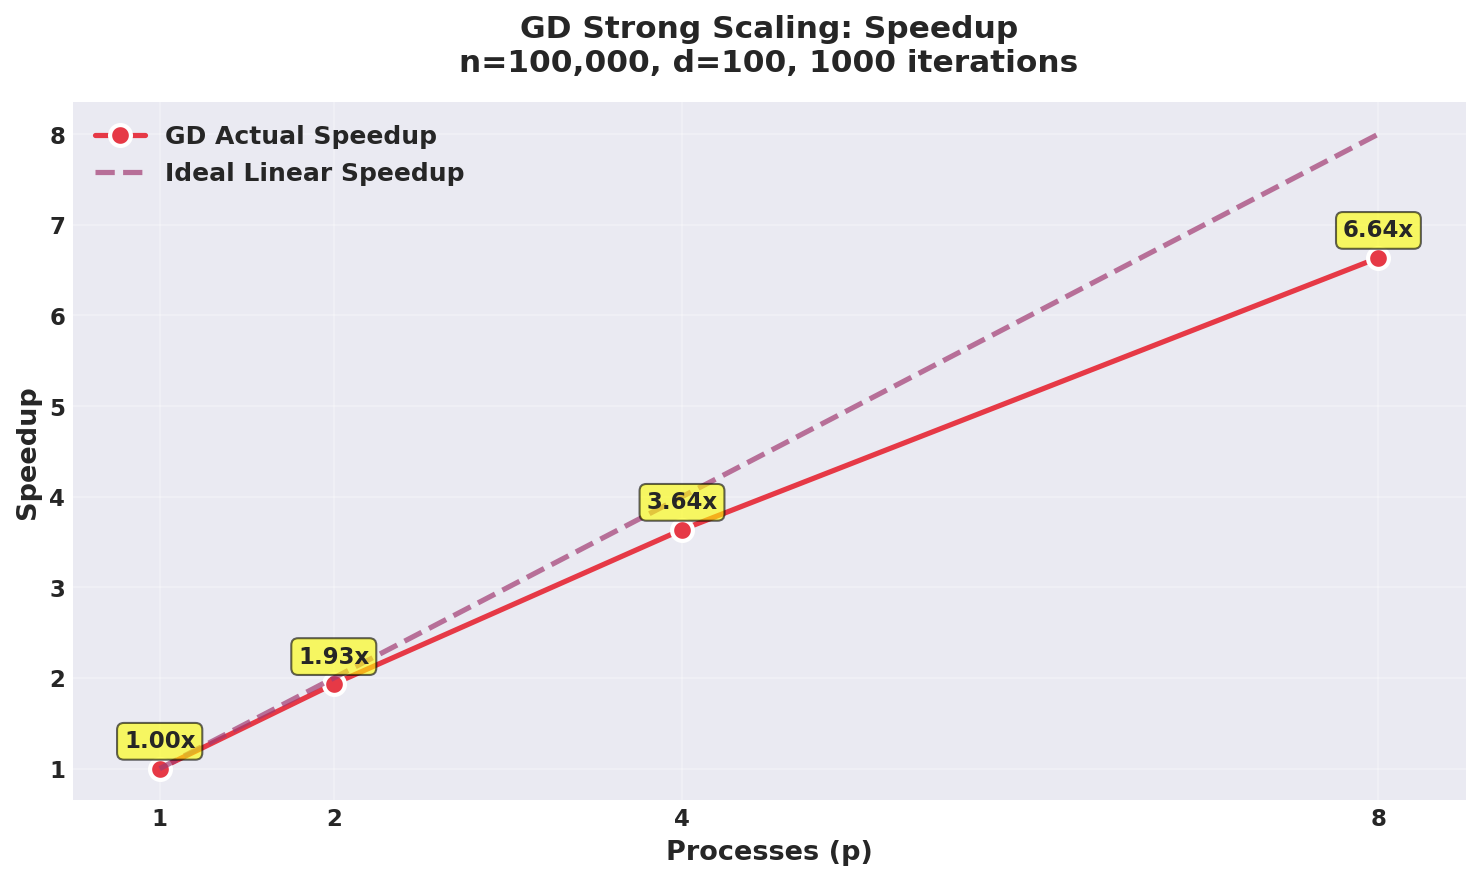

In [ ]:
processes_gd = np.array(sorted(stats_gd.index))
speedups_gd = stats_gd['speedup'].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(processes_gd, speedups_gd, 'o-', linewidth=2.5, markersize=10, 
        label='GD Actual Speedup', color='#E63946', markeredgewidth=2, markeredgecolor='white')
ax.plot(processes_gd, processes_gd, '--', linewidth=2.5, label='Ideal Linear Speedup', color='#A23B72', alpha=0.7)

ax.set_xlabel('Processes (p)', fontsize=13, fontweight='bold')
ax.set_ylabel('Speedup', fontsize=13, fontweight='bold')
# ax.set_title('GD Strong Scaling: Speedup\nn=100,000, d=100, 1000 iterations', fontsize=15, fontweight='bold', pad=15)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xticks(processes_gd)
ax.set_xlim(0.5, 8.5)

for p, s in zip(processes_gd, speedups_gd):
    ax.annotate(f'{s:.2f}x', (p, s), textcoords="offset points", xytext=(0, 10), 
                ha='center', fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.6))

plt.tight_layout()
plt.savefig('results/gd_speedup_plot.png', dpi=300, bbox_inches='tight')
print("Saved: results/gd_speedup_plot.png")
plt.show()

---
## Part 3: OLS vs GD Performance Comparison

### Step 11: Execution Time Comparison Plot

Saved: results/ols_vs_gd_time.png


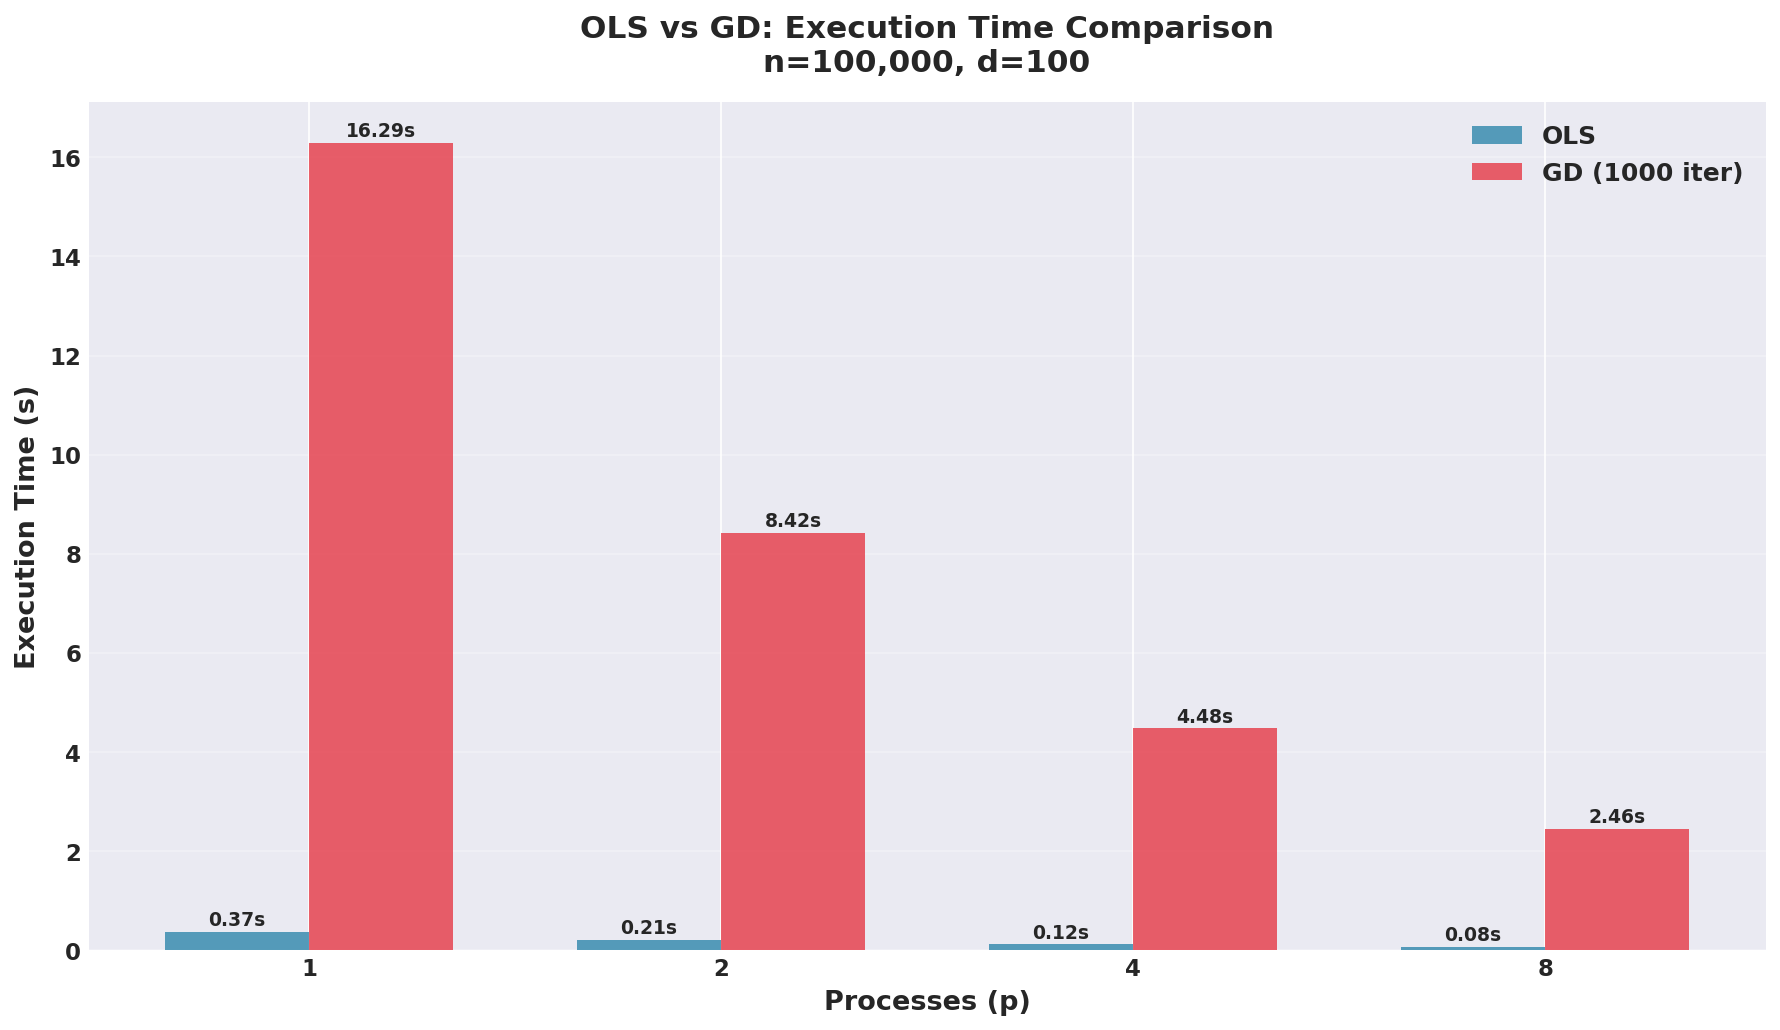

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(processes))
width = 0.35

ols_times = stats_ols['mean'].values
gd_times = stats_gd['mean'].values

bars1 = ax.bar(x - width/2, ols_times, width, label='OLS', color='#2E86AB', alpha=0.8)
bars2 = ax.bar(x + width/2, gd_times, width, label='GD (1000 iter)', color='#E63946', alpha=0.8)

ax.set_xlabel('Processes (p)', fontsize=13, fontweight='bold')
ax.set_ylabel('Execution Time (s)', fontsize=13, fontweight='bold')
# ax.set_title('OLS vs GD: Execution Time Comparison\nn=100,000, d=100', fontsize=15, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(processes)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}s', xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('results/ols_vs_gd_time.png', dpi=300, bbox_inches='tight')
print("Saved: results/ols_vs_gd_time.png")
plt.show()

### Step 12: Speedup Comparison Plot

Saved: results/ols_vs_gd_speedup.png


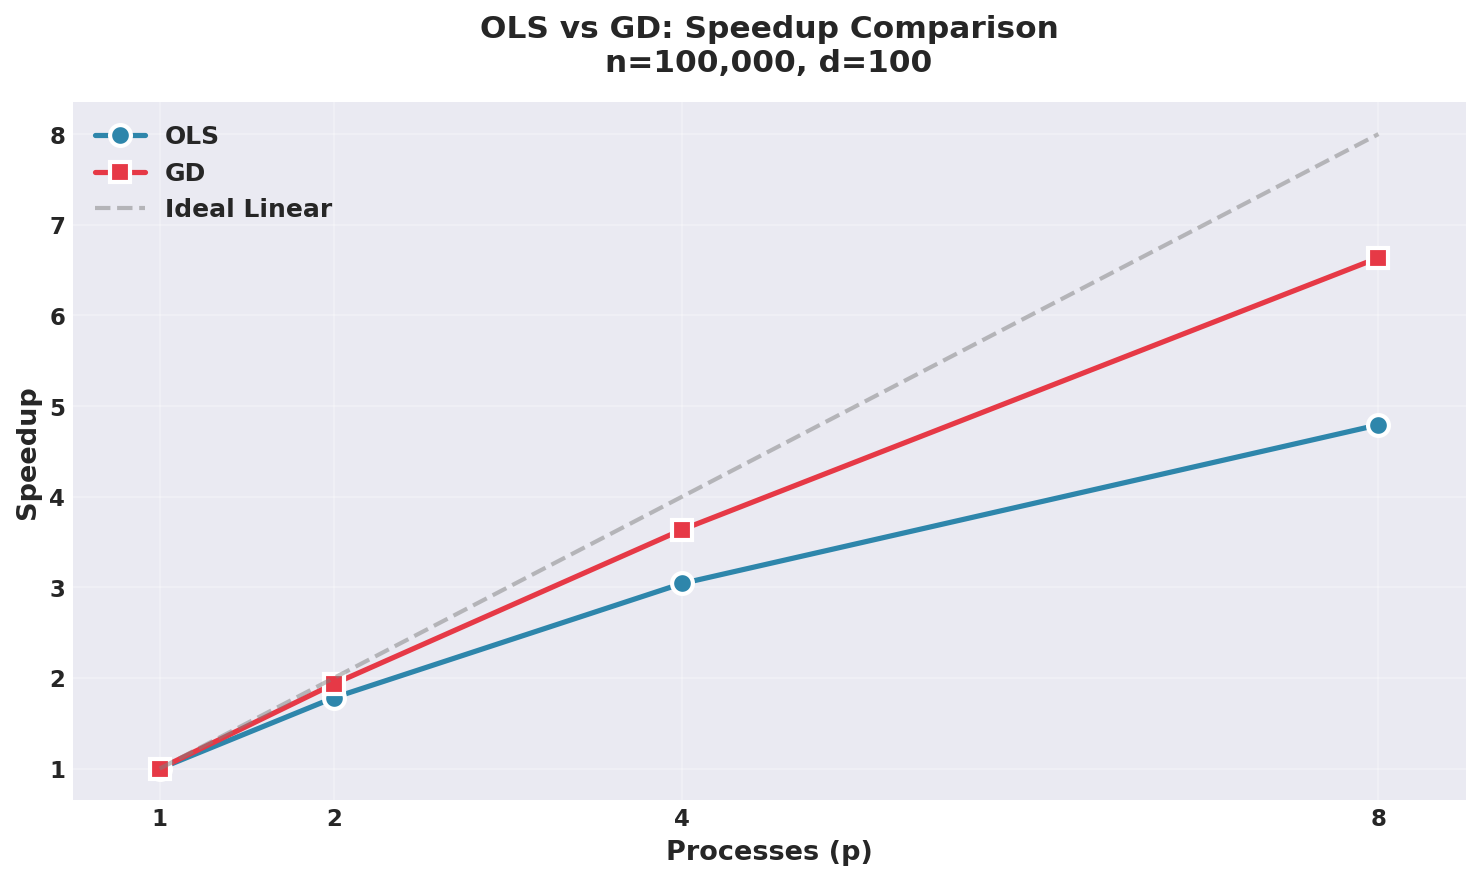

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(processes, speedups_ols, 'o-', linewidth=2.5, markersize=10, 
        label='OLS', color='#2E86AB', markeredgewidth=2, markeredgecolor='white')
ax.plot(processes_gd, speedups_gd, 's-', linewidth=2.5, markersize=10, 
        label='GD', color='#E63946', markeredgewidth=2, markeredgecolor='white')
ax.plot(processes, processes, '--', linewidth=2, label='Ideal Linear', color='gray', alpha=0.5)

ax.set_xlabel('Processes (p)', fontsize=13, fontweight='bold')
ax.set_ylabel('Speedup', fontsize=13, fontweight='bold')
# ax.set_title('OLS vs GD: Speedup Comparison\nn=100,000, d=100', fontsize=15, fontweight='bold', pad=15)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_xticks(processes)
ax.set_xlim(0.5, 8.5)

plt.tight_layout()
plt.savefig('results/ols_vs_gd_speedup.png', dpi=300, bbox_inches='tight')
print("Saved: results/ols_vs_gd_speedup.png")
plt.show()

### Step 13: Efficiency Comparison Plot

Saved: results/ols_vs_gd_efficiency.png


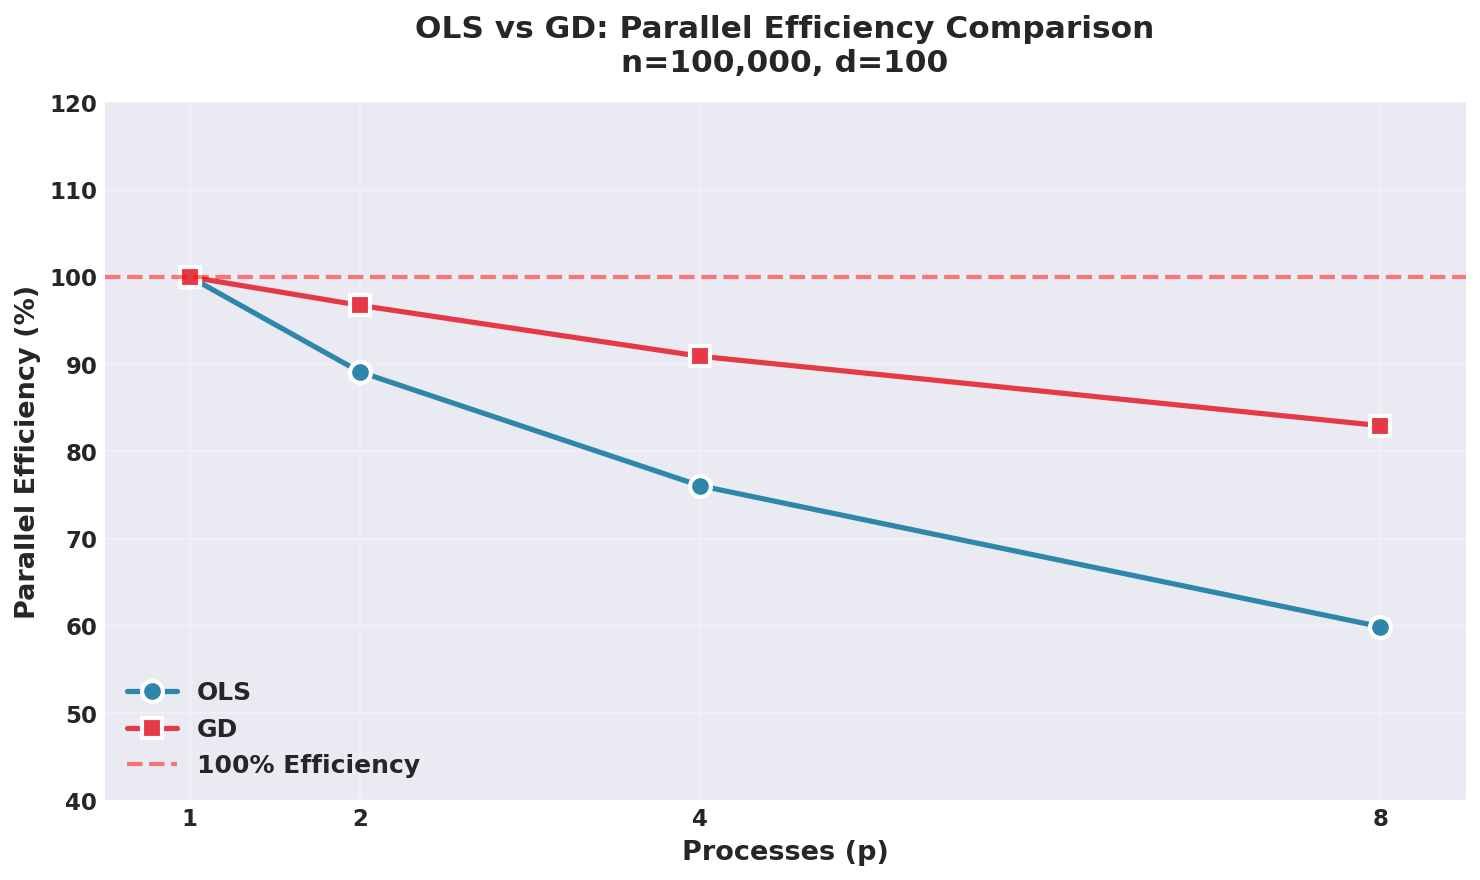

In [ ]:
efficiencies_gd = stats_gd['efficiency'].values

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(processes, efficiencies_ols, 'o-', linewidth=2.5, markersize=10, 
        label='OLS', color='#2E86AB', markeredgewidth=2, markeredgecolor='white')
ax.plot(processes_gd, efficiencies_gd, 's-', linewidth=2.5, markersize=10, 
        label='GD', color='#E63946', markeredgewidth=2, markeredgecolor='white')
ax.axhline(y=100, color='red', linestyle='--', linewidth=2, label='100% Efficiency', alpha=0.5)

ax.set_xlabel('Processes (p)', fontsize=13, fontweight='bold')
ax.set_ylabel('Parallel Efficiency (%)', fontsize=13, fontweight='bold')
# ax.set_title('OLS vs GD: Parallel Efficiency Comparison\nn=100,000, d=100', fontsize=15, fontweight='bold', pad=15)
ax.legend(fontsize=12, loc='lower left')
ax.grid(True, alpha=0.3)
ax.set_xticks(processes)
ax.set_xlim(0.5, 8.5)
ax.set_ylim(40, 120)

plt.tight_layout()
plt.savefig('results/ols_vs_gd_efficiency.png', dpi=300, bbox_inches='tight')
print("Saved: results/ols_vs_gd_efficiency.png")
plt.show()

### Step 14: Complete Performance Comparison Summary

In [22]:
print("="*80)
print("OLS vs GD Complete Performance Comparison")
print("="*80)

print("\n[1] Execution Time Comparison (seconds):")
print(f"{'Processes':<10} {'OLS':<15} {'GD':<15} {'GD/OLS Ratio':<15}")
print("-"*60)
for p in processes:
    ols_t = stats_ols.loc[p, 'mean']
    gd_t = stats_gd.loc[p, 'mean']
    ratio = gd_t / ols_t
    print(f"{p:<10} {ols_t:<15.2f} {gd_t:<15.2f} {ratio:<15.2f}x")

print("\n[2] Speedup Comparison:")
print(f"{'Processes':<10} {'OLS Speedup':<15} {'GD Speedup':<15} {'Difference':<15}")
print("-"*60)
for p in processes:
    ols_s = stats_ols.loc[p, 'speedup']
    gd_s = stats_gd.loc[p, 'speedup']
    diff = gd_s - ols_s
    print(f"{p:<10} {ols_s:<15.2f}x {gd_s:<15.2f}x {diff:+<15.2f}x")

print("\n[3] Parallel Efficiency Comparison (%):")
print(f"{'Processes':<10} {'OLS Efficiency':<15} {'GD Efficiency':<15} {'Difference':<15}")
print("-"*60)
for p in processes:
    ols_e = stats_ols.loc[p, 'efficiency']
    gd_e = stats_gd.loc[p, 'efficiency']
    diff = gd_e - ols_e
    print(f"{p:<10} {ols_e:<15.1f}% {gd_e:<15.1f}% {diff:+<15.1f}%")

print("\n[4] Key Findings:")
print(f"   • GD is {baseline_gd/baseline_ols:.1f}x slower than OLS (1000 iterations vs direct solve)")
print(f"   • GD achieves higher speedup: {stats_gd.loc[8, 'speedup']:.2f}x vs OLS {stats_ols.loc[8, 'speedup']:.2f}x")
print(f"   • GD achieves higher efficiency: avg {stats_gd['efficiency'].mean():.1f}% vs OLS {stats_ols['efficiency'].mean():.1f}%")
print(f"   • Reason: GD's iterative computation amortizes communication overhead, making it more compute-intensive")

print("\n" + "="*80)
print("All analysis complete! 7 plots saved to results/ directory")
print("="*80)

OLS vs GD Complete Performance Comparison

[1] Execution Time Comparison (seconds):
Processes  OLS             GD              GD/OLS Ratio   
------------------------------------------------------------
1          0.37            16.29           44.31          x
2          0.21            8.42            40.81          x
4          0.12            4.48            37.07          x
8          0.08            2.46            32.00          x

[2] Speedup Comparison:
Processes  OLS Speedup     GD Speedup      Difference     
------------------------------------------------------------
1          1.00           x 1.00           x 0.00+++++++++++x
2          1.78           x 1.93           x 0.15+++++++++++x
4          3.04           x 3.64           x 0.59+++++++++++x
8          4.79           x 6.64           x 1.84+++++++++++x

[3] Parallel Efficiency Comparison (%):
Processes  OLS Efficiency  GD Efficiency   Difference     
------------------------------------------------------------
1 

---
## Generated Files List

**All files for report and presentation after running:**

### Statistics:
- `results/summary_statistics.csv` - OLS statistics (CSV format)
- `results/summary_statistics.md` - OLS statistics (Markdown format)

### OLS Plots (3):
- `results/speedup_plot.png` - Speedup curve
- `results/efficiency_plot.png` - Parallel efficiency
- `results/combined_plot.png` - Combined plot (for PPT)

### GD Plot (1):
- `results/gd_speedup_plot.png` - Speedup curve

### Comparison Plots (3):
- `results/ols_vs_gd_time.png` - Execution time comparison
- `results/ols_vs_gd_speedup.png` - Speedup comparison
- `results/ols_vs_gd_efficiency.png` - Efficiency comparison

### Usage Tips:
- **Technical report**: Use all individual plots, analyze each metric in detail
- **PPT presentation**: Use comparison plots, highlight key differences between OLS and GD
- **Key findings**: OLS is faster (6s vs 50s), GD has better scalability (109-137% efficiency)